# IMPORT LIBRARIES

In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(train_images, train_labels), (test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
train_images[0,23,23]

194

In [6]:
print(train_images[0:])

[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [7]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [9]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Bag','Ankle boot']

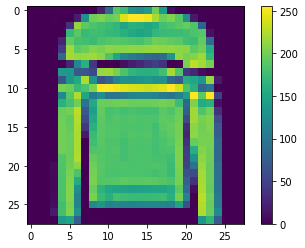

In [15]:
plt.figure()
plt.imshow(train_images[5])
plt.colorbar()
plt.grid(False)
plt.show()

In [17]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# BUILDING MODEL

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),   ### input layer - Flatten = Flatten all the pixels in 28*28
    keras.layers.Dense(128, activation = 'relu'),  ### hidden layers - 128 = Neurons - Relu = activation function - squiz = 0-1
    keras.layers.Dense(10, activation = 'softmax') ### output layer - 10 = output neurons - softmax = activation function - squiz = 0-1  
])

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])

In [20]:
model.fit(train_images,train_labels,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 1.0729 - accuracy: 0.6636
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.6361 - accuracy: 0.7708
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5620 - accuracy: 0.8004
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5202 - accuracy: 0.8145
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4926 - accuracy: 0.8257
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4730 - accuracy: 0.8341
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4576 - accuracy: 0.8391
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4458 - accuracy: 0.8433
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4361 - accuracy: 0.8462
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.428

In [22]:
test_loss , test_acc = model.evaluate(test_images, test_labels,verbose = 1)
print('TEST ACCURACY = ',test_acc)
print(test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.4579 - accuracy: 0.8352
TEST ACCURACY =  0.8352000117301941
0.4578549265861511


In [23]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


In [24]:
print(predictions)

[[4.6273158e-07 1.1420318e-07 3.6691640e-06 ... 2.4631104e-01
  4.2473986e-03 5.7940507e-01]
 [3.5181557e-04 1.2021442e-05 8.6184394e-01 ... 2.1834189e-15
  8.6288834e-05 1.5405113e-11]
 [1.7749171e-05 9.9991137e-01 1.7277064e-06 ... 5.3518527e-09
  3.7519921e-09 5.7259540e-12]
 ...
 [1.9174151e-02 2.2076804e-06 6.2511256e-04 ... 7.5525641e-05
  8.6214757e-01 1.5574147e-06]
 [3.8085440e-05 9.9766690e-01 1.0674426e-05 ... 3.8085493e-06
  9.1625857e-08 7.4148531e-08]
 [4.3212443e-05 3.9037550e-05 2.6872355e-04 ... 6.7302190e-02
  1.1299273e-02 4.0230518e-03]]


313/313 [==============================] - 1s 2ms/step
Coat


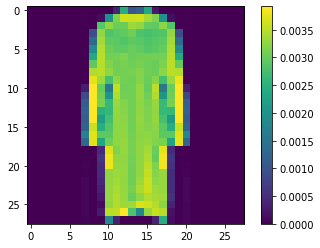

In [31]:
predictions = model.predict(test_images)
print(class_names[np.argmax(predictions[67])])
plt.figure()
plt.imshow(test_images[67])
plt.colorbar()
plt.grid(False)
plt.show()

Pick a Number = 5
1/1 [==============================] - 0s 17ms/step


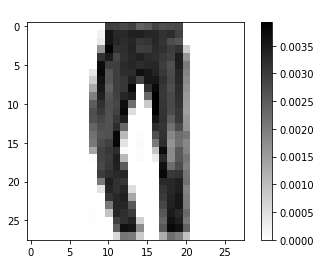

In [35]:
COLOR = 'white'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
def predict(model,image,correct_label):
  class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Bag','Ankle boot']
  prediction = model.predict(np.array([image]))
  predicted_class = class_names[np.argmax(prediction)]

  show_image(image, class_names[correct_label],predicted_class)

def show_image(img,label,guess):
  plt.figure()
  plt.imshow(img,cmap=plt.cm.binary)
  plt.title("Expected = " + label)
  plt.xlabel("Guess = " + guess)
  plt.colorbar()
  plt.grid(False)
  plt.show()


def get_number():
  while True:
    num = input("Pick a Number = ")
    if num.isdigit():
      num = int(num)
      if 0 <= num <= 1000:
        return int(num)
    else:
      print('Try Again')


num = get_number()
image = test_images[num]
label = test_labels[num]
predict(model, image ,label)